In [5]:
%matplotlib inline  

import mnist_reader
import numpy as np
import matplotlib.pyplot as plt


X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [4]:
print(X_train.shape)

(60000, 784)


9


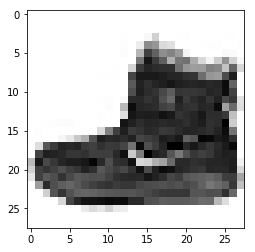

In [16]:
plt.imshow(np.reshape(X_train[0,:], (28,28)), cmap=plt.cm.Greys)
print(y_train[0])

In [27]:
a = np.reshape(X_train[0,:], (28,28))
b = X_train[0,:]

In [28]:
# Flattening function
np.ndarray.flatten()

TypeError: descriptor 'flatten' of 'numpy.ndarray' object needs an argument

In [40]:
from numpy.matlib import repmat

def create_2D_noise(dim_array=(56,56), beta=-1):
    """
    Function translated by Asier Erramuzpe (@erramuzpe)
    from: https://www.mathworks.com/matlabcentral/fileexchange/5091-generate-spatial-data
    Jon Yearsley  1 May 2004
    j.yearsley@macaulay.ac.uk
   
    This function generates 1/f spatial noise, with a normal error 
    distribution (the grid must be at least 10x10 for the errors to be normal). 
    1/f noise is scale invariant, there is no spatial scale for which the 
    variance plateaus out, so the process is non-stationary.
   
        dim_array is a two component vector that sets the size of the spatial pattern
              (dim_array=[10,5] is a 10x5 spatial grid)
        beta defines the spectral distribution. 
             Spectral density S(f) = N f^beta
             (f is the frequency, N is normalisation coeff).
                  beta = 0 is random white noise.  
                  beta  -1 is pink noise
                  beta = -2 is Brownian noise
            The fractal dimension is related to beta by, D = (6+beta)/2
     
    Note that the spatial pattern is periodic.  If this is not wanted the
    grid size should be doubled and only the first quadrant used.
    Time series can be generated by setting one component of dim_array to 1
    he method is briefly descirbed in Lennon, J.L. "Red-shifts and red
    herrings in geographical ecology", Ecography, Vol. 23, p101-113 (2000)
    
    Many natural systems look very similar to 1/f processes, so generating
    1/f noise is a useful null model for natural systems.
    The errors are normally distributed because of the central
    limit theorem.  The phases of each frequency component are randomly
    assigned with a uniform distribution from 0 to 2*pi. By summing up the
    frequency components the error distribution approaches a normal
    distribution.
    
    # S_f corrected to be S_f = (u.^2 + v.^2).^(beta/2);  2/10/05
    """
    # Generate the grid of frequencies. u is the set of frequencies along the
    # first dimension
    # First quadrant are positive frequencies.  Zero frequency is at u(1,1).
    list_1 = list(range(0, int(np.floor(dim_array[0] / 2)) + 1))
    list_2 = list(range(-int(np.ceil(dim_array[0] / 2) - 1), 0, 1))
    u = np.concatenate((list_1, list_2)) / dim_array[0]
    # Reproduce these frequencies along ever row
    u = np.reshape(repmat(u,1,dim_array[1]), dim_array).T

    # v is the set of frequencies along the second dimension.  For a square
    # region it will be the transpose of u
    list_1 = list(range(0, int(np.floor(dim_array[1] / 2)) + 1))
    list_2 = list(range(-int(np.ceil(dim_array[1] / 2) - 1), 0, 1))
    v = np.concatenate((list_1, list_2)) / dim_array[1]
    # Reproduce these frequencies along ever row
    v = np.reshape(repmat(v,dim_array[0],1), dim_array)


    # Generate the power spectrum
    S_f = np.power(np.power(u,2) + np.power(v,2), (beta/2))
    # Set any infinities to zero
    S_f[np.isinf(S_f)] = 0


    # Generate a grid of random phase shifts
    phi =  np.random.random(dim_array)

    # Inverse Fourier transform to obtain the the spatial pattern
    x = np.fft.ifft2(np.power(S_f, 0.5) * (np.cos(2 * np.pi * phi) + 1j * np.sin(2 * np.pi * phi)))

    # Pick just the real component
    return np.real(x)

/home/asier/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:60: RuntimeWarning: divide by zero encountered in power


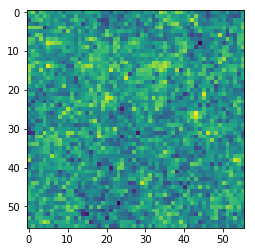

In [41]:
plt.imshow(create_2D_noise())